In [1]:
import numpy as np 
import pandas as pd


In [2]:
df1 = pd.read_csv("daily_energy_demand.csv")

In [3]:
df1.head()

,Timestamp,Demand
0,2020-01-01,91799.276872
1,2020-01-02,92898.771836
2,2020-01-03,92880.328257
3,2020-01-04,82642.391232
4,2020-01-05,81996.193891


In [4]:
df2 = pd.read_csv("daily_energy_generated.csv")

In [5]:
df2.head()

,date,kWh
0,2020-01-01,2220.359
1,2020-01-02,2405.921
2,2020-01-03,1226.902
3,2020-01-04,4453.968
4,2020-01-05,5913.243


In [6]:
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
df2['date'] = pd.to_datetime(df2['date'])


In [7]:
df1 = df1.rename(columns={'Timestamp': 'date'})

In [8]:
df = pd.merge(df1, df2, on='date', how='inner')

In [9]:
df.sample(5)

,date,Demand,kWh
1795,2024-11-30,94405.065602,1729.600
1687,2024-08-14,149897.189317,3684.976
406,2021-02-10,102845.853098,7769.218
729,2021-12-30,95407.425997,282.539
1749,2024-10-15,119332.252111,427.813


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1827 non-null   datetime64[ns]
 1   Demand  1827 non-null   float64       
 2   kWh     1827 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 42.9 KB


In [11]:
df['kWh'] = df['kWh'] * 1.32

# difference between canada and delhi

In [12]:
df

,date,Demand,kWh
0,2020-01-01,91799.276872,2930.87388
1,2020-01-02,92898.771836,3175.81572
2,2020-01-03,92880.328257,1619.51064
3,2020-01-04,82642.391232,5879.23776
4,2020-01-05,81996.193891,7805.48076
...,...,...,...
1822,2024-12-27,97634.533101,2250.73068
1823,2024-12-28,86567.553693,1949.40768
1824,2024-12-29,87728.744059,2625.19224
1825,2024-12-30,97912.729433,3937.97580


In [13]:
df['kWh'] = df['kWh'] * 41.52

In [14]:
df['kWh'] = df['kWh'] / 1000

# for energy generation in MW


In [15]:
df['EnergyMWh'] = df['kWh']
df['DemandMW'] = df['Demand']

In [16]:
df = df.drop(columns=['kWh', 'Demand'])


In [17]:
df['DemandMW'] = df['DemandMW'] / 3.636
df['EnergyMWh'] = df['EnergyMWh'] * 1.59


In [18]:
df[['EnergyMWh', 'DemandMW']].describe()


,EnergyMWh,DemandMW
count,1827.000000,1827.000000
mean,400.516048,33003.251732
std,299.662340,5838.169930
min,0.004531,22003.149162
25%,102.779491,28353.914984
50%,390.798761,32016.243145
75%,661.469200,38605.037507
max,1091.961005,45309.287335


In [22]:
df

,date,EnergyMWh,DemandMW
0,2020-01-01,193.486915,25247.325872
1,2020-01-02,209.657191,25549.717227
2,2020-01-03,106.914910,25544.644735
3,2020-01-04,388.128463,22728.930482
4,2020-01-05,515.292862,22551.208441
...,...,...,...
1822,2024-12-27,148.586037,26852.181821
1823,2024-12-28,128.693657,23808.458111
1824,2024-12-29,173.306791,24127.817398
1825,2024-12-30,259.972561,26928.693463


In [27]:
import pandas as pd

# Ensure 'date' column is datetime
df['date'] = pd.to_datetime(df['date'])

# Create date/time features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['dayofyear'] = df['date'].dt.dayofyear
df['dayofweek'] = df['date'].dt.dayofweek       # Monday=0
df['weekofyear'] = df['date'].dt.isocalendar().week
df['quarterofyear'] = df['date'].dt.quarter
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)



# Season mapping
def get_season(month):
    if month in [3, 4, 5, 6]:
        return 'Summer'
    elif month in [7, 8, 9, 10]:
        return 'Monsoon'
    else:
        return 'Winter'

df['season'] = df['month'].apply(get_season)



In [29]:
df

,date,EnergyMWh,DemandMW,year,month,dayofyear,dayofweek,weekofyear,quarterofyear,is_weekend,season
0,2020-01-01,193.486915,25247.325872,2020,1,1,2,1,1,0,Winter
1,2020-01-02,209.657191,25549.717227,2020,1,2,3,1,1,0,Winter
2,2020-01-03,106.914910,25544.644735,2020,1,3,4,1,1,0,Winter
3,2020-01-04,388.128463,22728.930482,2020,1,4,5,1,1,1,Winter
4,2020-01-05,515.292862,22551.208441,2020,1,5,6,1,1,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...
1822,2024-12-27,148.586037,26852.181821,2024,12,362,4,52,4,0,Winter
1823,2024-12-28,128.693657,23808.458111,2024,12,363,5,52,4,1,Winter
1824,2024-12-29,173.306791,24127.817398,2024,12,364,6,52,4,1,Winter
1825,2024-12-30,259.972561,26928.693463,2024,12,365,0,1,4,0,Winter


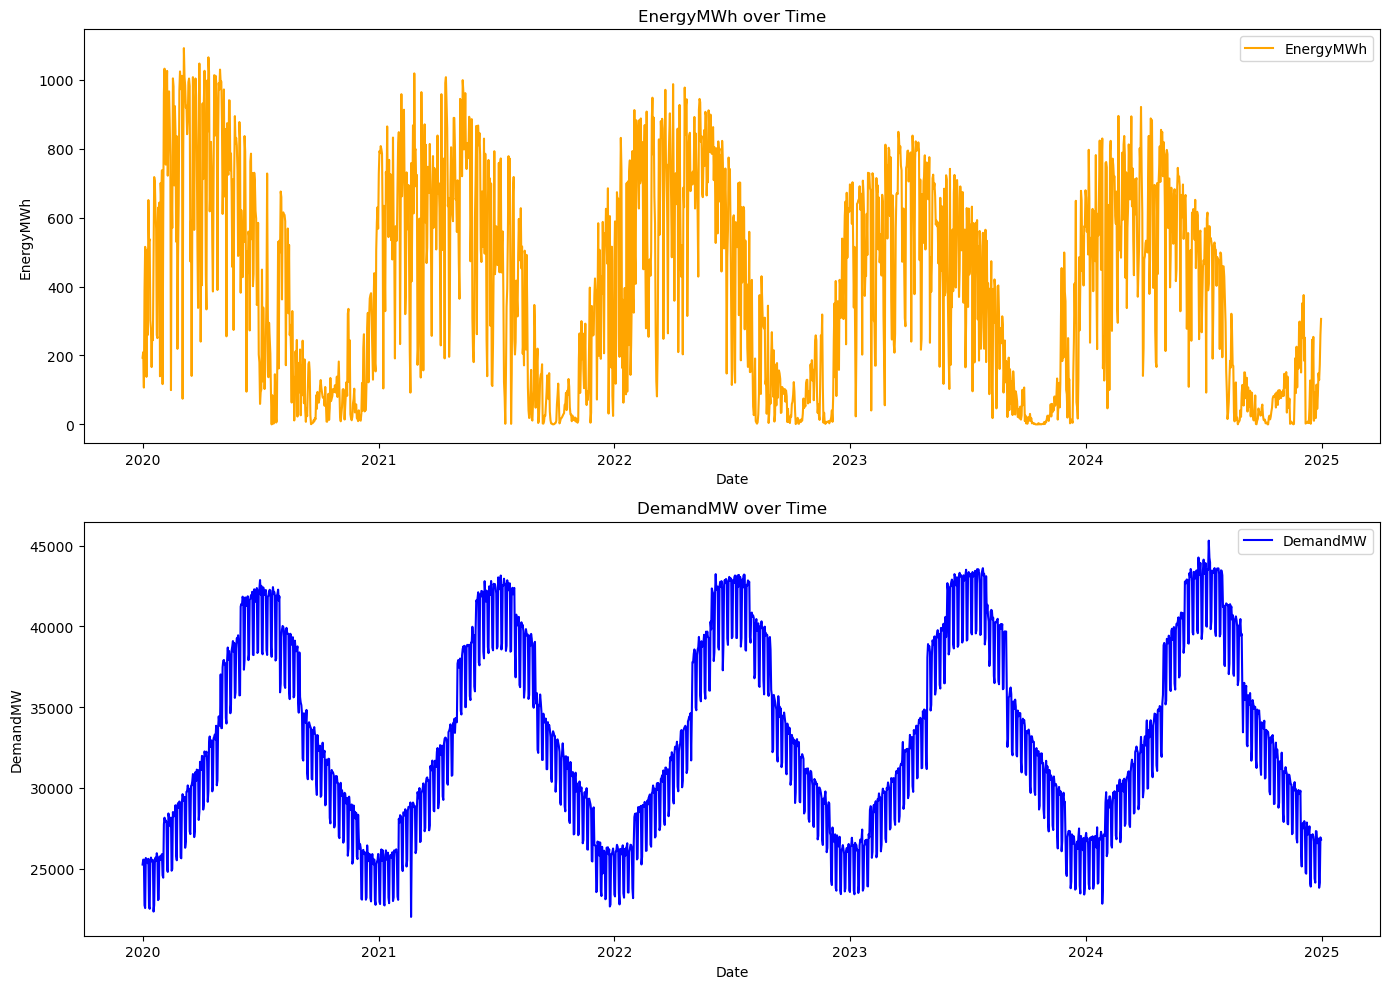

In [43]:
import matplotlib.pyplot as plt

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))  # 2 rows, 1 column

# First subplot: Energy over time
ax1.plot(df['date'], df['EnergyMWh'], color='orange', label='EnergyMWh')
ax1.set_xlabel('Date')
ax1.set_ylabel('EnergyMWh')
ax1.set_title('EnergyMWh over Time')
ax1.legend()

# Second subplot: Demand over time
ax2.plot(df['date'], df['DemandMW'], color='blue', label='DemandMW')
ax2.set_xlabel('Date')
ax2.set_ylabel('DemandMW')
ax2.set_title('DemandMW over Time')
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


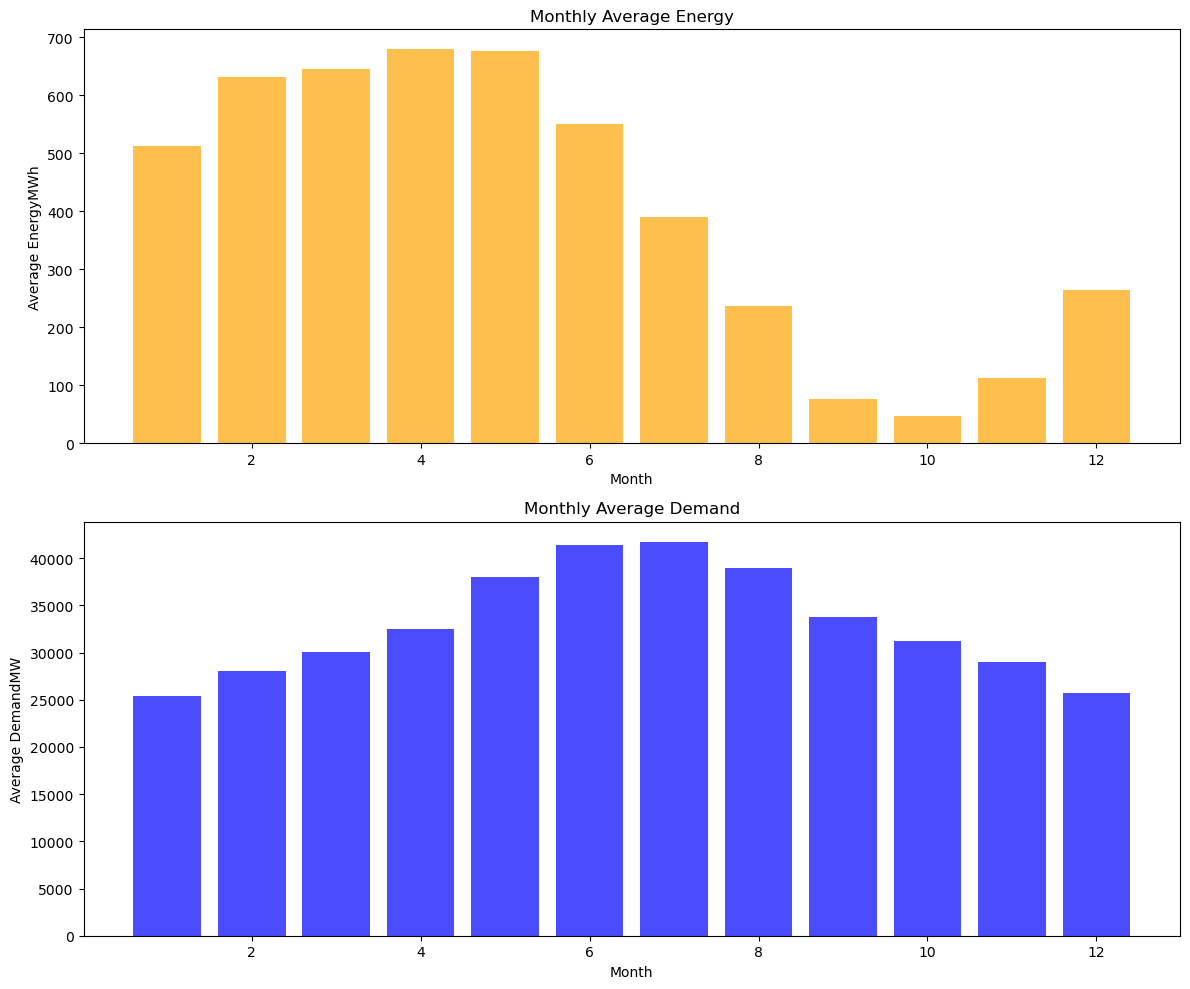

In [41]:
import matplotlib.pyplot as plt

# Compute monthly averages
energy_avg = df.groupby('month')['EnergyMWh'].mean()
demand_avg = df.groupby('month')['DemandMW'].mean()

months = range(1, 13)

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))  # 2 rows, 1 column

# First subplot: Energy
ax1.bar(months, energy_avg, color='orange', alpha=0.7)
ax1.set_xlabel('Month')
ax1.set_ylabel('Average EnergyMWh')
ax1.set_title('Monthly Average Energy')

# Second subplot: Demand
ax2.bar(months, demand_avg, color='blue', alpha = 0.7)
ax2.set_xlabel('Month')
ax2.set_ylabel('Average DemandMW')
ax2.set_title('Monthly Average Demand')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


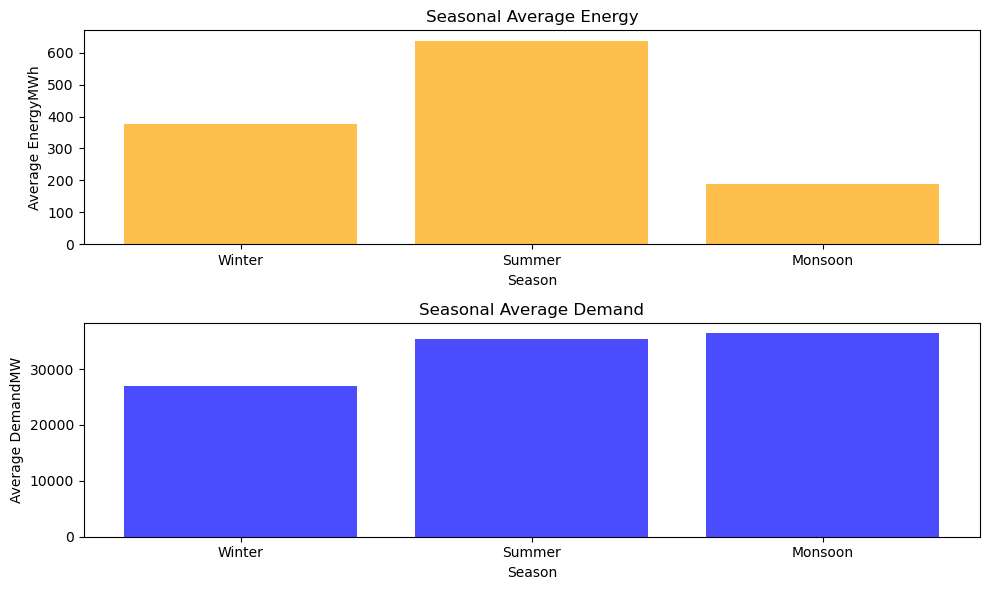

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute seasonal averages
energy_avg_season = df.groupby('season')['EnergyMWh'].mean()
demand_avg_season = df.groupby('season')['DemandMW'].mean()

seasons = ['Winter', 'Summer', 'Monsoon']  # Order you want to display

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))  # 2 rows, 1 column

# First subplot: Energy
ax1.bar(seasons, energy_avg_season[seasons], color='orange', alpha=0.7)
ax1.set_xlabel('Season')
ax1.set_ylabel('Average EnergyMWh')
ax1.set_title('Seasonal Average Energy')

# Second subplot: Demand
ax2.bar(seasons, demand_avg_season[seasons], color='blue', alpha=0.7)
ax2.set_xlabel('Season')
ax2.set_ylabel('Average DemandMW')
ax2.set_title('Seasonal Average Demand')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


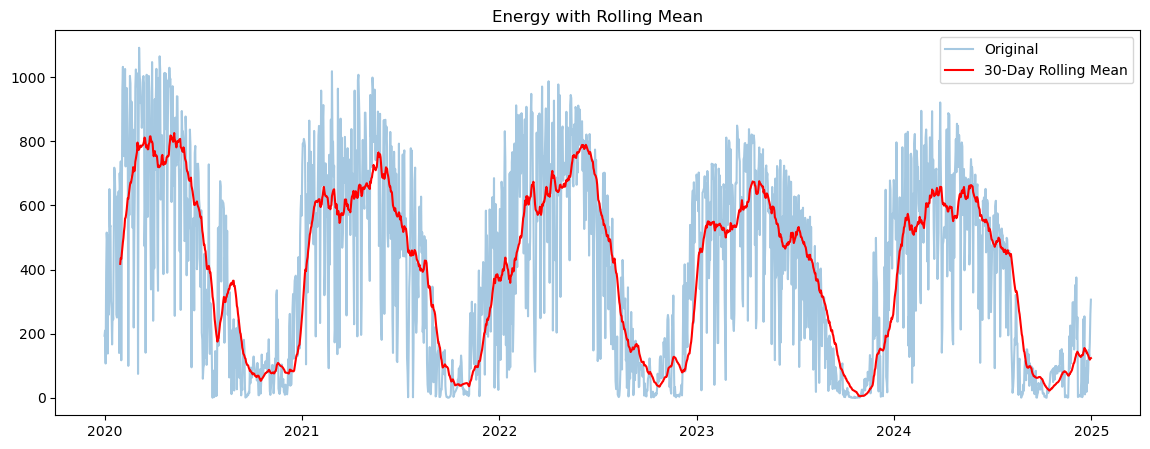

In [51]:
df['Energy_rolling30'] = df['EnergyMWh'].rolling(30).mean()
plt.figure(figsize=(14,5))
plt.plot(df['date'], df['EnergyMWh'], alpha=0.4, label='Original')
plt.plot(df['date'], df['Energy_rolling30'], label='30-Day Rolling Mean', color='red')
plt.title('Energy with Rolling Mean')
plt.legend()
plt.show()


In [53]:
df['DeficitMW'] = df['DemandMW'] - df['EnergyMWh']


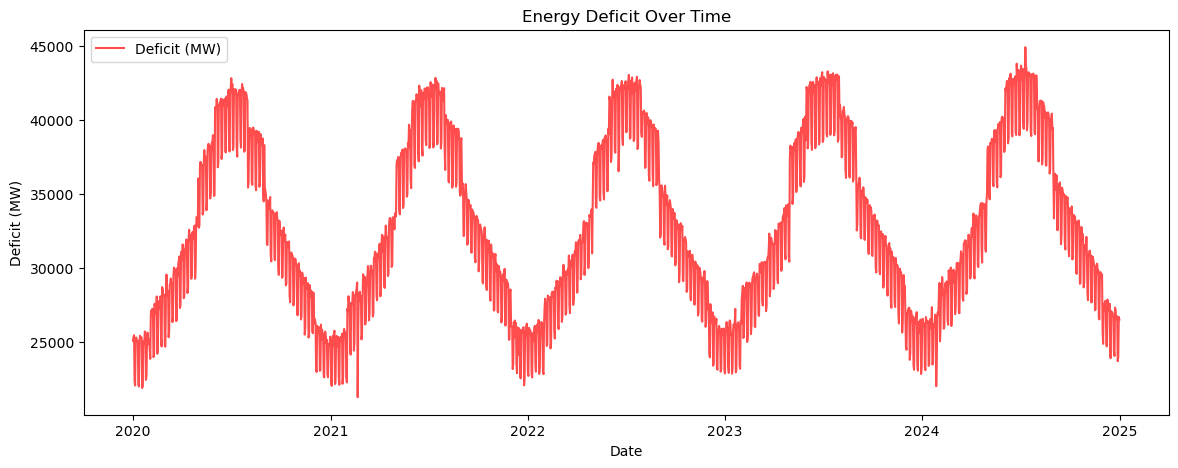

In [55]:
plt.figure(figsize=(14,5))
plt.plot(df['date'], df['DeficitMW'], color='red', alpha=0.7, label='Deficit (MW)')
plt.xlabel('Date')
plt.ylabel('Deficit (MW)')
plt.title('Energy Deficit Over Time')
plt.legend()
plt.show()


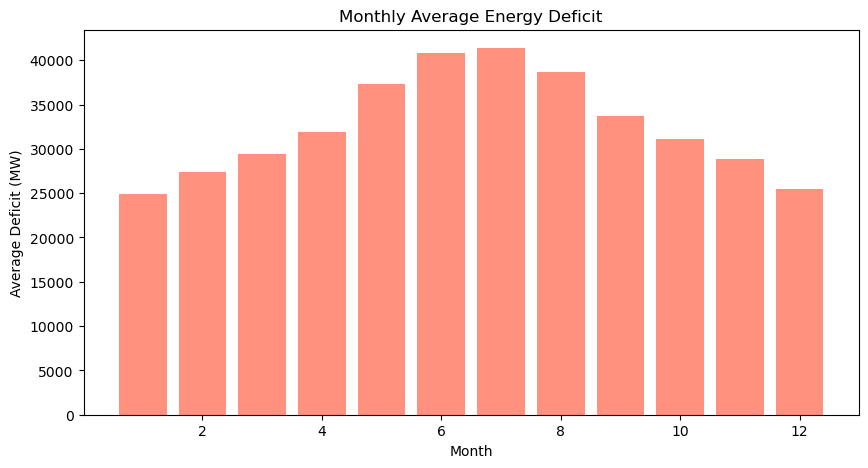

In [57]:
monthly_deficit = df.groupby('month')['DeficitMW'].mean()

plt.figure(figsize=(10,5))
plt.bar(monthly_deficit.index, monthly_deficit.values, color='tomato', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Average Deficit (MW)')
plt.title('Monthly Average Energy Deficit')
plt.show()


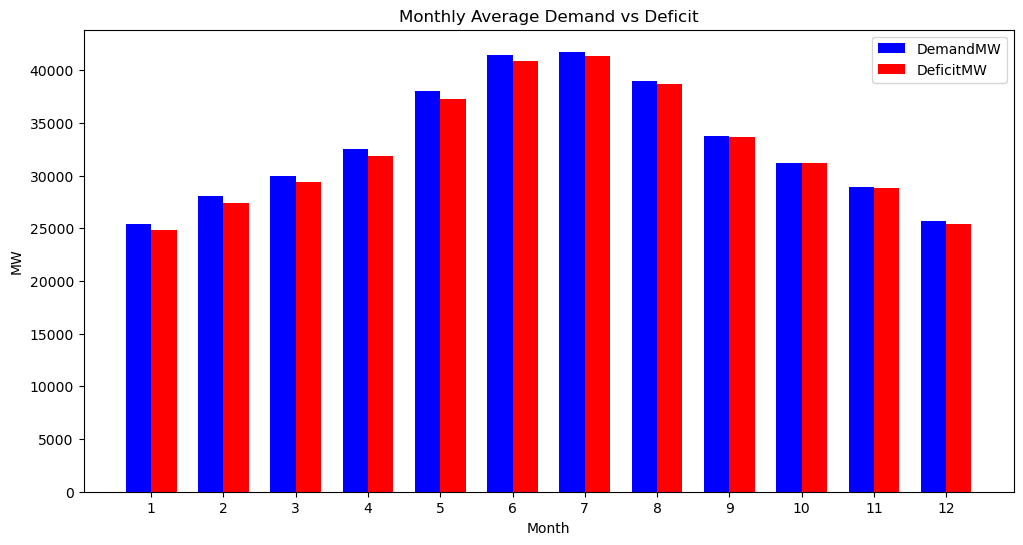

In [61]:

# Aggregate by month for clearer bars (you can also do by day)
df['month'] = df['date'].dt.month
monthly_data = df.groupby('month')[['DemandMW', 'DeficitMW']].mean()

months = monthly_data.index
demand = monthly_data['DemandMW'].values
deficit = monthly_data['DeficitMW'].values

bar_width = 0.35
x = np.arange(len(months))

plt.figure(figsize=(12,6))

# Plot side-by-side bars
plt.bar(x - bar_width/2, demand, width=bar_width, color='blue', label='DemandMW')
plt.bar(x + bar_width/2, deficit, width=bar_width, color='red', label='DeficitMW')

plt.xlabel('Month')
plt.ylabel('MW')
plt.title('Monthly Average Demand vs Deficit')
plt.xticks(x, months)
plt.legend()
plt.show()

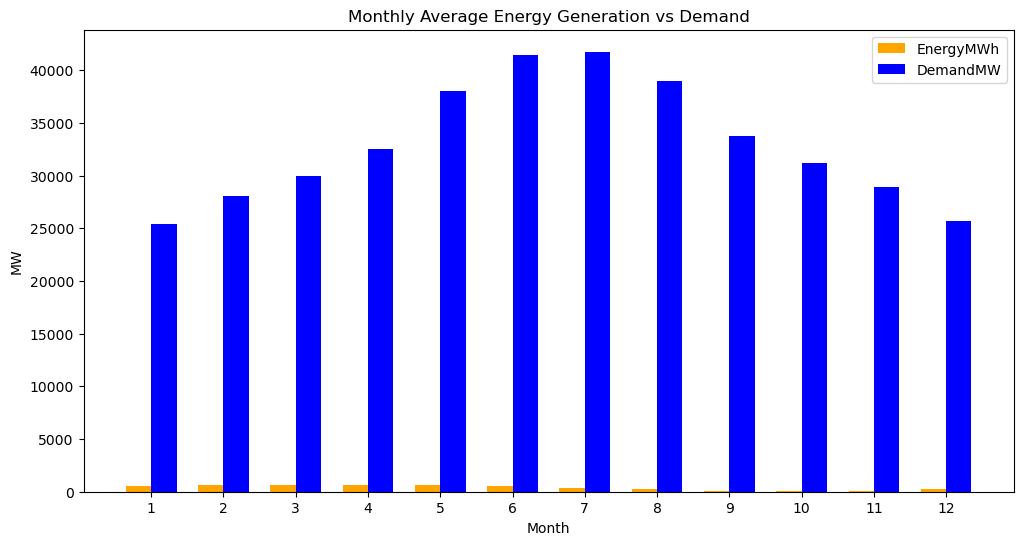

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Aggregate by month for clarity
df['month'] = df['date'].dt.month
monthly_data = df.groupby('month')[['EnergyMWh', 'DemandMW']].mean()

months = monthly_data.index
energy = monthly_data['EnergyMWh'].values
demand = monthly_data['DemandMW'].values

bar_width = 0.35
x = np.arange(len(months))

plt.figure(figsize=(12,6))

# Plot side-by-side bars
plt.bar(x - bar_width/2, energy, width=bar_width, color='orange', label='EnergyMWh')
plt.bar(x + bar_width/2, demand, width=bar_width, color='blue', label='DemandMW')

plt.xlabel('Month')
plt.ylabel('MW')
plt.title('Monthly Average Energy Generation vs Demand')
plt.xticks(x, months)
plt.legend()
plt.show()


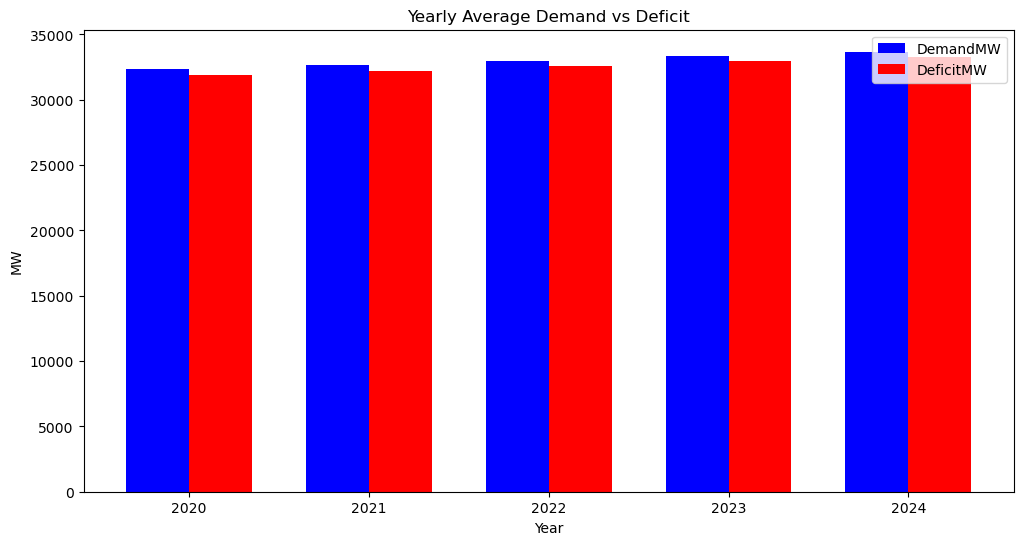

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Compute deficit if not already done
df['DeficitMW'] = df['DemandMW'] - df['EnergyMWh']

# Aggregate by year
yearly_data = df.groupby('year')[['DemandMW', 'DeficitMW']].mean()

years = yearly_data.index
demand = yearly_data['DemandMW'].values
deficit = yearly_data['DeficitMW'].values

bar_width = 0.35
x = np.arange(len(years))

plt.figure(figsize=(12,6))

# Side-by-side bars
plt.bar(x - bar_width/2, demand, width=bar_width, color='blue', label='DemandMW')
plt.bar(x + bar_width/2, deficit, width=bar_width, color='red', label='DeficitMW')

plt.xlabel('Year')
plt.ylabel('MW')
plt.title('Yearly Average Demand vs Deficit')
plt.xticks(x, years)
plt.legend()
plt.show()


In [79]:
df.to_csv('Demand&supply.csv', index = False)